# Importing libraries

In [1]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sn
import ast
import spacy
import string
import re
import nltk
import ast
import gensim
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, r2_score
from sklearn.neural_network import MLPClassifier
from scipy.stats import beta
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import GridSearchCV

In [2]:
def plot_hist(data):
    plt.figure(figsize=(15, 7))
    weights = np.ones_like(data)/float(len(data))
    plt.hist(data, weights=weights)
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.grid()

In [3]:
def check_lookup(key):
    return models.lookup[str(np.array(key))]

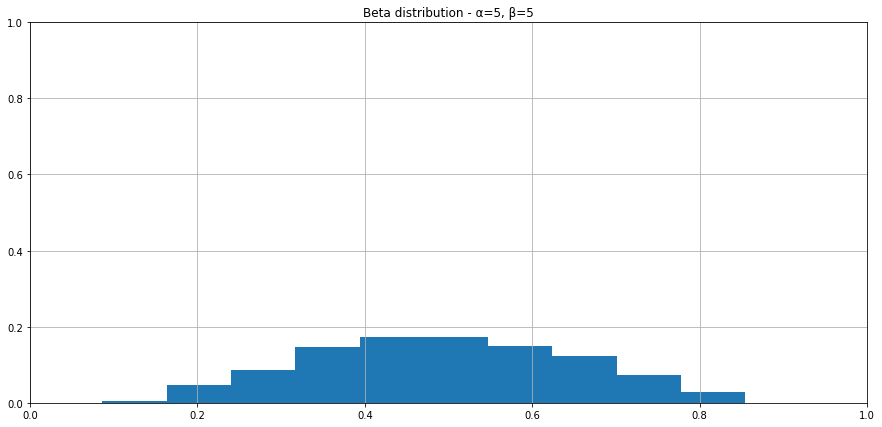

In [4]:
np.random.seed(seed=142)
plot_hist(beta.rvs(5,5, size=500))
plt.title("Beta distribution - α=5, β=5")
plt.show()

# Importing selected models

In [5]:
fullname = "selected_models/15.02.2021_17.15/models.pickle"
file = open(fullname, "rb")
models = pickle.load(file)

In [6]:
models.all_memberships

{0: array([0.62564923, 0.53683263, 0.74551837, 0.25122142, 1.        ,
        0.8284658 , 1.        , 0.        , 0.66984835, 1.        ,
        0.80456999, 1.        , 0.09456614, 0.56752063, 0.31159662,
        1.        , 0.21925375, 1.        , 0.3643941 , 0.        ,
        0.        , 1.        , 0.41189109, 0.        , 1.        ,
        0.01265817, 0.11790756, 0.01268269, 0.75959832, 0.        ,
        0.53815855, 0.56495342, 0.73407451, 0.26720809, 0.59633853,
        0.        , 0.65889028, 0.        , 0.47850132, 0.33546734,
        0.61113208, 0.56136163, 0.01870815, 1.        , 0.        ,
        1.        , 1.        , 1.        , 0.        , 0.        ,
        1.        , 0.70408698, 0.60193364, 0.        , 0.        ,
        0.        , 0.75079288, 0.01819156, 0.        , 0.        ,
        0.60548559, 0.        , 1.        , 0.46456862, 0.03624972,
        0.        , 0.93710341, 1.        , 0.        , 1.        ,
        1.        , 0.        , 1.        , 1

In [7]:
models.all_labels

{0: array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
        0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
        0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
        1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 1: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
        1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
        0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1]),
 2: array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
        0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
        1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
        1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
        0, 

In [8]:
models.folds

{'x train 0': array([[ 0.25600943, -0.23234066,  0.12546545, ..., -0.31500113,
         -0.7055682 , -1.616844  ],
        [ 0.38872892, -0.20435974,  0.1544835 , ..., -0.32833022,
         -0.70944923, -1.699858  ],
        [ 0.3040668 , -0.16037548,  0.16744614, ..., -0.41776842,
         -0.736372  , -1.6103612 ],
        ...,
        [ 0.55712444, -0.326111  ,  0.10707735, ..., -0.24778815,
         -0.71912396, -1.5883652 ],
        [ 0.28743565, -0.2281481 ,  0.04990921, ..., -0.28259733,
         -0.72687936, -1.5714185 ],
        [ 0.2875573 , -0.28609794,  0.05343039, ..., -0.3204702 ,
         -0.7165842 , -1.6304562 ]]),
 'y train 0': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
        1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
        0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0

In [9]:
all_memberships = models.all_memberships
memberships = []

for i in range(0,5):
    for j in all_memberships[i]:
        memberships.append(j)
        
memberships = pd.DataFrame(memberships)

In [10]:
memberships[0:10]

,0
0,0.625649
1,0.536833
2,0.745518
3,0.251221
4,1.000000
5,0.828466
6,1.000000
7,0.000000
8,0.669848
9,1.000000


In [11]:
all_training_memberships = models.all_training_memberships
training_memberships = []

for i in range(0,5):
    for j in all_training_memberships[i]:
        training_memberships.append(j)
        
training_memberships = pd.DataFrame(training_memberships)

In [12]:
training_memberships[0:10]

,0
0,0.336802
1,0.424794
2,0.255449
3,0.134240
4,0.243447
5,0.307548
6,0.471808
7,0.348738
8,0.341986
9,0.000000


In [13]:
all_labels = models.all_labels
labels = []

for i in range(0,5):
    for j in all_labels[i]:
        labels.append(j)
        
labels = pd.DataFrame(labels)

In [14]:
labels[0:10]

,0
0,0
1,1
2,1
3,0
4,1
5,1
6,1
7,0
8,0
9,1


## Retrieve expected memberships

In [15]:
PATH_TEXTS = "generated_datasets/15.02.2021_16.14/generated_dataset_500.csv"

# data loading
dataset = pd.read_csv(PATH_TEXTS)

In [16]:
all_memberships = models.all_memberships
all_folds = models.folds
memberships = []
folds = []

for i in range(0,5):
    for j, k in zip(all_memberships[i], all_folds["x test " + str(i)]):
        memberships.append(j)
        folds.append(k)

In [17]:
total_data = pd.DataFrame(folds)
total_data["x"] = total_data.values.tolist()
for i in range(0,len(total_data.columns) - 1):
    del total_data[i]

In [18]:
total_data["approximated memberships"] = memberships
total_data

,x,approximated memberships
0,"[0.38326302, -0.26677814, 0.1527985, -1.091193...",0.625649
1,"[0.39121658, -0.27166966, 0.10585584, -1.06263...",0.536833
2,"[0.44274032, -0.28218, 0.13366066, -1.1218977,...",0.745518
3,"[0.2615585, -0.20228602, 0.12741217, -1.113784...",0.251221
4,"[0.6959626, -0.35916966, 0.1963535, -1.1279806...",1.000000
...,...,...
495,"[0.27347043, -0.13027708, 0.08972673, -1.04297...",0.060874
496,"[0.35893622, -0.22168587, 0.14953363, -1.06389...",0.209944
497,"[0.55712444, -0.326111, 0.10707735, -1.1424634...",0.929364
498,"[0.28743565, -0.2281481, 0.04990921, -1.044071...",0.397492


In [19]:
total_data["expected memberships"] = dataset["membership"]

In [20]:
total_data

,x,approximated memberships,expected memberships
0,"[0.38326302, -0.26677814, 0.1527985, -1.091193...",0.625649,0.490122
1,"[0.39121658, -0.27166966, 0.10585584, -1.06263...",0.536833,0.535910
2,"[0.44274032, -0.28218, 0.13366066, -1.1218977,...",0.745518,0.520413
3,"[0.2615585, -0.20228602, 0.12741217, -1.113784...",0.251221,0.435328
4,"[0.6959626, -0.35916966, 0.1963535, -1.1279806...",1.000000,0.681458
...,...,...,...
495,"[0.27347043, -0.13027708, 0.08972673, -1.04297...",0.060874,0.404512
496,"[0.35893622, -0.22168587, 0.14953363, -1.06389...",0.209944,0.424316
497,"[0.55712444, -0.326111, 0.10707735, -1.1424634...",0.929364,0.559962
498,"[0.28743565, -0.2281481, 0.04990921, -1.044071...",0.397492,0.458237


In [21]:
all_training_memberships = models.all_training_memberships
all_folds = models.folds
training_memberships = []
folds = []

for i in range(0,5):
    for j, k in zip(all_training_memberships[i], all_folds["x train " + str(i)]):
        training_memberships.append(j)
        folds.append(k)

In [22]:
total_training_data = pd.DataFrame(folds)
total_training_data["x"] = total_training_data.values.tolist()
for i in range(0,len(total_training_data.columns) - 1):
    del total_training_data[i]

In [23]:
total_training_data["approximated memberships"] = training_memberships
total_training_data

,x,approximated memberships
0,"[0.25600943, -0.23234066, 0.12546545, -1.05001...",0.336802
1,"[0.38872892, -0.20435974, 0.1544835, -1.050411...",0.424794
2,"[0.3040668, -0.16037548, 0.16744614, -1.001316...",0.255449
3,"[0.2810014, -0.17626162, 0.13876279, -1.016453...",0.134240
4,"[0.3168549, -0.1741134, 0.10946823, -1.0268496...",0.243447
...,...,...
1995,"[0.67903996, -0.33133465, 0.076018825, -1.1678...",1.000000
1996,"[0.53525096, -0.24553344, 0.18882687, -1.09457...",0.862878
1997,"[0.366098, -0.2927403, 0.029094916, -1.0993509...",0.553207
1998,"[0.23682672, -0.15584964, 0.09712028, -1.06469...",0.000000


In [24]:
total_training_data["x"] = total_training_data["x"].apply(lambda s: tuple(s))
total_training_data

,x,approximated memberships
0,"(0.25600943, -0.23234066, 0.12546545, -1.05001...",0.336802
1,"(0.38872892, -0.20435974, 0.1544835, -1.050411...",0.424794
2,"(0.3040668, -0.16037548, 0.16744614, -1.001316...",0.255449
3,"(0.2810014, -0.17626162, 0.13876279, -1.016453...",0.134240
4,"(0.3168549, -0.1741134, 0.10946823, -1.0268496...",0.243447
...,...,...
1995,"(0.67903996, -0.33133465, 0.076018825, -1.1678...",1.000000
1996,"(0.53525096, -0.24553344, 0.18882687, -1.09457...",0.862878
1997,"(0.366098, -0.2927403, 0.029094916, -1.0993509...",0.553207
1998,"(0.23682672, -0.15584964, 0.09712028, -1.06469...",0.000000


In [25]:
total_training_data = total_training_data.drop_duplicates(subset=['x'])

In [26]:
dataset["text"] = dataset["text"].apply(lambda s: ast.literal_eval(s))
dataset["text"] = dataset["text"].apply(lambda s: tuple(s))
dataset

,index,old index,text,membership
0,0,361,"(0.38326302, -0.26677814, 0.1527985, -1.091193...",0.490122
1,1,73,"(0.39121658, -0.27166966, 0.10585584, -1.06263...",0.535910
2,2,374,"(0.44274032, -0.28218, 0.13366066, -1.1218977,...",0.520413
3,3,155,"(0.2615585, -0.20228602, 0.12741217, -1.113784...",0.435328
4,4,104,"(0.6959626, -0.35916966, 0.1963535, -1.1279806...",0.681458
...,...,...,...,...
495,495,106,"(0.27347043, -0.13027708, 0.08972673, -1.04297...",0.404512
496,496,270,"(0.35893622, -0.22168587, 0.14953363, -1.06389...",0.424316
497,497,348,"(0.55712444, -0.326111, 0.10707735, -1.1424634...",0.559962
498,498,435,"(0.28743565, -0.2281481, 0.04990921, -1.044071...",0.458237


In [27]:
counter = 0
original_training_data_positions = []

for i in total_training_data.iterrows():
    for j in dataset.iterrows():
        if i[1]["x"] == j[1]["text"]:
            original_training_data_positions.append(j[0])

In [28]:
original_training_data = []

for i in original_training_data_positions:
    original_training_data.append(dataset["membership"].iloc[i])

In [29]:
total_training_data["expected memberships"] = original_training_data
total_training_data

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,x,approximated memberships,expected memberships
0,"(0.25600943, -0.23234066, 0.12546545, -1.05001...",0.336802,0.454393
1,"(0.38872892, -0.20435974, 0.1544835, -1.050411...",0.424794,0.452139
2,"(0.3040668, -0.16037548, 0.16744614, -1.001316...",0.255449,0.428168
3,"(0.2810014, -0.17626162, 0.13876279, -1.016453...",0.134240,0.403659
4,"(0.3168549, -0.1741134, 0.10946823, -1.0268496...",0.243447,0.422243
...,...,...,...
495,"(0.62567055, -0.34798884, 0.1590085, -1.073142...",1.000000,0.645137
496,"(0.5515581, -0.2526918, 0.16184653, -1.00611, ...",0.936327,0.597931
497,"(0.63271815, -0.34744138, 0.06483508, -1.17798...",1.000000,0.686731
498,"(0.5868319, -0.37838978, 0.075572014, -1.12092...",1.000000,0.609268


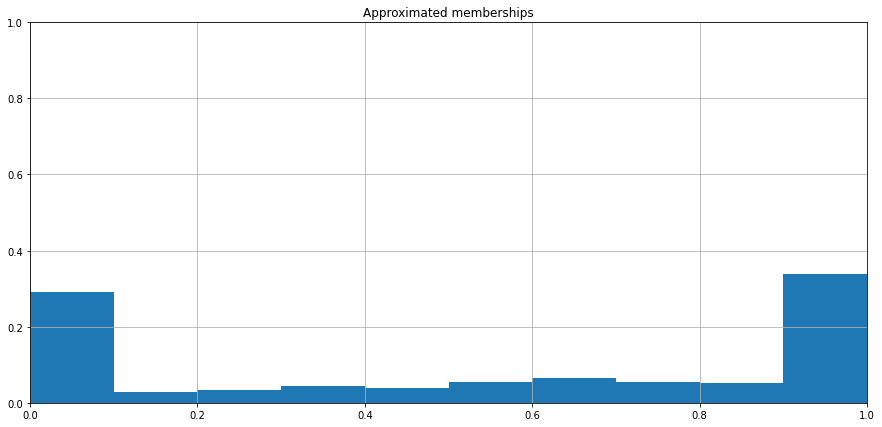

In [30]:
plot_hist(total_data["approximated memberships"])

plt.title("Approximated memberships")
plt.show()

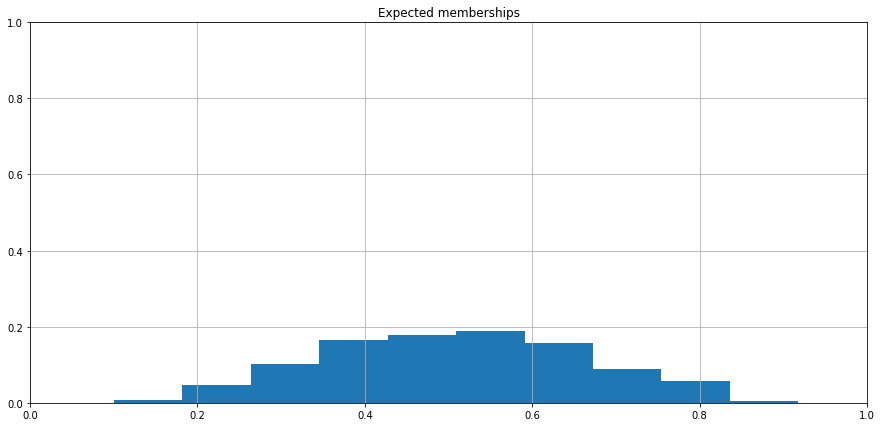

In [31]:
plot_hist(total_data["expected memberships"])

plt.title("Expected memberships")
plt.show()

In [32]:
def square_loss(prediction, y):
    return (y - prediction) ** 2

def RMSE(prediction, y):
    loss = square_loss(prediction, y)
    return np.sqrt(1/len(loss) * sum(loss))

Training error

In [33]:
RMSE(total_training_data["approximated memberships"], total_training_data["expected memberships"])

0.2767849144838933

Test error

In [34]:
RMSE(total_data["approximated memberships"], total_data["expected memberships"])

0.29432794573769244

In [35]:
def select_radius(radius, threshold):
    special_range = [(approx[1], approx[2]) for x, approx in total_data.iterrows() if approx[1] <= threshold + radius and approx[1] >= threshold - radius]
    return special_range

In [36]:
for i in select_radius(0.15, 0.5):
    print(i)

(0.6256492332838678, 0.4901224301777672)
(0.5368326270366974, 0.5359102049925173)
(0.5675206256186274, 0.5291714442045902)
(0.36439409948292, 0.4794146100173777)
(0.41189109278010116, 0.4575306539116247)
(0.5381585507766182, 0.4593314614749024)
(0.5649534177787984, 0.4850173598714161)
(0.5963385259475213, 0.4895456282113605)
(0.4785013220266683, 0.4986587028952049)
(0.6111320757175771, 0.5228962448192567)
(0.5613616325035762, 0.4747843104017445)
(0.6019336439435925, 0.5302023256339994)
(0.6054855902158434, 0.4951766620815635)
(0.4645686157677057, 0.5007258552790871)
(0.48330097333703514, 0.4896715250318328)
(0.5083687538917179, 0.4898566487066893)
(0.6443597012911251, 0.4543934798727122)
(0.3970059141813007, 0.42224344932520136)
(0.4466400216584385, 0.4387380984876124)
(0.551455983224376, 0.5280060071677175)
(0.49218941658610493, 0.5062508665386297)
(0.42295505635755914, 0.4690292628978507)
(0.5715244247284497, 0.5062496177833079)
(0.6325835577095449, 0.5016213127332606)
(0.59988919473

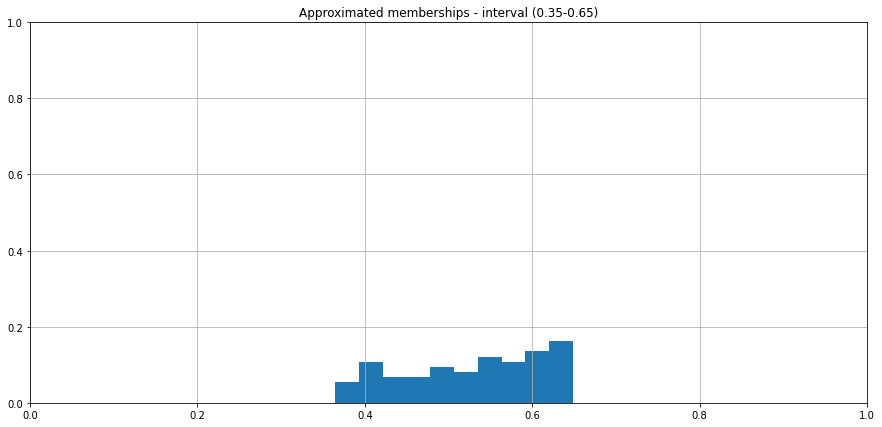

In [37]:
plot_hist([x[0] for x in select_radius(0.15, 0.5)])

plt.title("Approximated memberships - interval (0.35-0.65)")
plt.show()

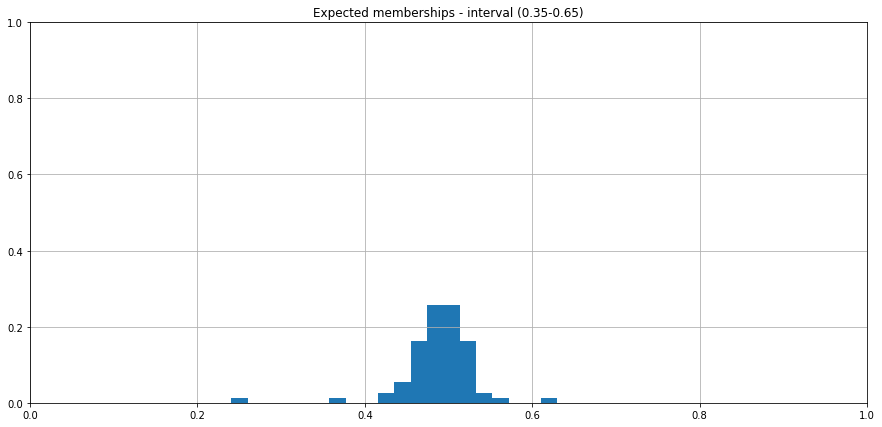

In [38]:
data = [x[1] for x in select_radius(0.15, 0.5)]
plt.figure(figsize=(15, 7))
weights = np.ones_like(data)/float(len(data))
binwidth = (max(data) - min(data)) / 10
plt.hist(data, bins=20, weights=weights)
plt.xlim(0,1)
plt.ylim(0,1)
plt.title("Expected memberships - interval (0.35-0.65)")
plt.grid()

In [39]:
recap = pd.DataFrame([[x[0], x[1]] for x in select_radius(0.15, 0.5)], columns=["approximated", "expected"])
RMSE(recap["approximated"], recap["expected"])

0.08345228598179481

# Baseline (Random Forest)

In [40]:
best_grid = [
    RandomForestRegressor(n_estimators=200, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=10, random_state=42),
    RandomForestRegressor(n_estimators=1000, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, random_state=42),
    RandomForestRegressor(n_estimators=200, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=10, random_state=42),
    RandomForestRegressor(n_estimators=300, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=12, random_state=42),
    RandomForestRegressor(n_estimators=1000, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, random_state=42)
]

In [41]:
# random_forest = RandomForestRegressor(random_state=42)

# Create the parameter grid based on the results of random search 
# param_grid = {
#     'bootstrap': [True],
#     'max_depth': [80, 90, 100, 110],
#     'max_features': [2, 3],
#     'min_samples_leaf': [3, 4, 5],
#     'min_samples_split': [8, 10, 12],
#     'n_estimators': [100, 200, 300, 1000]
# }

# best_grid = []

# rf_pred_train = []
# rf_pred_test = []

# rf_scores_train = []
# rf_scores_test = []
training_predictions = []
test_predictions = []

for i in range(0,5):
    X_train = models.folds['x train '+str(i)]
    y_train = models.folds['y train '+str(i)]
    X_test = models.folds['x test '+str(i)]
    y_test = models.folds['y test '+str(i)]
    
    # Instantiate the grid search model
    # gs = GridSearchCV(estimator = random_forest, param_grid = param_grid, cv = 4, n_jobs = -1, verbose = 2)
    # gs.fit(X_train, y_train)
    
    # y_pred_train = gs.best_estimator_.predict(X_train)
    # y_pred_test = gs.best_estimator_.predict(X_test)
    
    # best_grid.append(gs.best_estimator_)
    # rf_pred_train.append(y_pred_train)
    # rf_pred_test.append(y_pred_test)
    
    # rf_scores_train.append(np.sqrt(mean_squared_error(y_train, y_pred_train)))
    # rf_scores_test.append(np.sqrt(mean_squared_error(y_test, y_pred_test)))
    best_grid[i].fit(X_train, y_train)
    
    training_predictions.append((best_grid[i].predict(X_train), X_train))
    test_predictions.append((best_grid[i].predict(X_test), X_test))
    
# print("Training error: ", np.mean(rf_scores_train))
# print("Test error: ", np.mean(rf_scores_test))

In [42]:
for i in best_grid:
    print(i.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': 80, 'max_features': 3, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 3, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': 80, 'max_features': 3, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 3, 'min_samples_split': 8, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 1000, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': 80, 'max_features': 3, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 3, 

In [43]:
baseline_train_predictions = []
baseline_test_predictions = []
baseline_train_data = []
baseline_test_data = []

for i in training_predictions:
    for j, k in zip(i[0],i[1]):
        baseline_train_predictions.append(j)
        baseline_train_data.append(k)
        
for i in test_predictions:
    for j, k in zip(i[0],i[1]):
        baseline_test_predictions.append(j)
        baseline_test_data.append(k)
        
baseline_train = pd.DataFrame(columns=["x", "baseline training memberships"])
baseline_train["x"] = baseline_train_data
baseline_train["baseline training memberships"] = baseline_train_predictions
baseline_train["x"] = baseline_train["x"].apply(lambda s: tuple(s))
baseline_train = baseline_train.drop_duplicates(subset=['x'])
baseline_train["expected memberships"] = total_training_data["expected memberships"]

baseline_test = pd.DataFrame(columns=["x", "baseline test memberships"])
baseline_test["x"] = baseline_test_data
baseline_test["baseline test memberships"] = baseline_test_predictions
baseline_test["x"] = baseline_test["x"].apply(lambda s: tuple(s))
baseline_test = baseline_test.drop_duplicates(subset=['x'])
baseline_test["expected memberships"] = total_data["expected memberships"]

Training error

In [44]:
RMSE(baseline_train["baseline training memberships"], baseline_train["expected memberships"])

0.3365762916460948

Test error

In [45]:
RMSE(baseline_test["baseline test memberships"], baseline_test["expected memberships"])

0.33985465192613923

In [46]:
special_range = [(base[1], base[2]) for x, base in baseline_test.iterrows() if base[1] <= 0.65 and base[1] >= 0.35]
recap = pd.DataFrame([[x[0], x[1]] for x in special_range], columns=["approximated", "expected"])
RMSE(recap["approximated"], recap["expected"])

0.0948055466983106

# Importing selected models - overlay

In [47]:
fullname = "selected_models/25.02.2021_14.40/models.pickle"
file = open(fullname, "rb")
models = pickle.load(file)

In [48]:
models.all_memberships

{0: array([0.        , 0.        , 0.25083465, 1.        , 1.        ,
        0.66515424, 0.        , 0.32414798, 1.        , 1.        ,
        0.93259001, 0.        , 0.07288427, 0.73067394, 0.67684927,
        0.        , 0.        , 0.        , 0.830364  , 1.        ,
        1.        , 1.        , 1.        , 0.60895721, 0.38574752,
        0.62021913, 0.47994218, 1.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.27471958, 0.33989998,
        1.        , 0.        , 0.        , 0.98058821, 0.        ,
        1.        , 1.        , 1.        , 1.        , 0.        ,
        1.        , 1.        , 0.32632381, 0.        , 0.80377174,
        1.        , 0.57536661, 1.        , 0.21788192, 1.        ,
        0.26564951, 0.61529571, 0.        , 0.60991013, 0.1519115 ,
        0.15501669, 0.17919517, 0.        , 0.30055887, 0.22791591,
        1.        , 0.        , 1.        , 1.        , 1.        ,
        0.        , 0.71935093, 1.        , 0

In [49]:
models.all_labels

{0: array([0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
        1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]),
 1: array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
        0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 2: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
        0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
        1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
        0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 

In [50]:
models.folds

{'x train 0': array([[ 0.49996272, -0.30062506, -0.01882591, ..., -0.13437757,
         -0.6392446 , -1.8004818 ],
        [ 0.37186787, -0.18866354, -0.03621354, ..., -0.10819756,
         -0.67685014, -1.8549793 ],
        [ 0.44493097, -0.22542424,  0.00709793, ..., -0.16634817,
         -0.6342273 , -1.8244094 ],
        ...,
        [ 0.3426194 , -0.24909912,  0.00429084, ..., -0.10938205,
         -0.71692353, -1.929139  ],
        [ 0.17948648, -0.1828294 ,  0.05502724, ..., -0.11963713,
         -0.686803  , -1.8351926 ],
        [ 0.5947702 , -0.24234557,  0.03919252, ..., -0.19224674,
         -0.6518655 , -1.804605  ]]),
 'y train 0': array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
        0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
        0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0

In [51]:
all_memberships = models.all_memberships
memberships = []

for i in range(0,5):
    for j in all_memberships[i]:
        memberships.append(j)
        
memberships = pd.DataFrame(memberships)

In [52]:
memberships[0:10]

,0
0,0.000000
1,0.000000
2,0.250835
3,1.000000
4,1.000000
5,0.665154
6,0.000000
7,0.324148
8,1.000000
9,1.000000


In [53]:
all_training_memberships = models.all_training_memberships
training_memberships = []

for i in range(0,5):
    for j in all_training_memberships[i]:
        training_memberships.append(j)
        
training_memberships = pd.DataFrame(training_memberships)

In [54]:
training_memberships[0:10]

,0
0,0.478569
1,0.000000
2,0.000000
3,0.389785
4,0.000000
5,0.654044
6,1.000000
7,0.000000
8,0.709827
9,0.000000


In [55]:
all_labels = models.all_labels
labels = []

for i in range(0,5):
    for j in all_labels[i]:
        labels.append(j)
        
labels = pd.DataFrame(labels)

In [56]:
labels[0:10]

,0
0,0
1,0
2,0
3,1
4,1
5,1
6,0
7,0
8,1
9,1


## Retrieve expected memberships - overlay

In [57]:
PATH_TEXTS = "generated_datasets/25.02.2021_13.56/generated_dataset_500.csv"

# data loading
dataset = pd.read_csv(PATH_TEXTS)

In [58]:
all_memberships = models.all_memberships
all_folds = models.folds
memberships = []
folds = []

for i in range(0,5):
    for j, k in zip(all_memberships[i], all_folds["x test " + str(i)]):
        memberships.append(j)
        folds.append(k)

In [59]:
total_data = pd.DataFrame(folds)
total_data["x"] = total_data.values.tolist()
for i in range(0,len(total_data.columns) - 1):
    del total_data[i]

In [60]:
total_data["approximated memberships"] = memberships
total_data

,x,approximated memberships
0,"[0.20888422, -0.18265866, 0.09055016, -1.06129...",0.000000
1,"[0.1689044, -0.18253174, -0.023186203, -0.9572...",0.000000
2,"[0.54621536, -0.24739723, 0.0071385135, -1.109...",0.250835
3,"[0.643499, -0.3045595, -0.005926449, -0.995395...",1.000000
4,"[0.76933706, -0.30182782, -0.013108519, -1.072...",1.000000
...,...,...
495,"[0.6465974, -0.26586124, -0.09934081, -1.01656...",0.796324
496,"[0.5632533, -0.33235434, -0.029181855, -1.0234...",0.941845
497,"[0.3426194, -0.24909912, 0.004290839, -1.11869...",0.000000
498,"[0.17948648, -0.1828294, 0.055027243, -1.02447...",0.000000


In [61]:
total_data["expected memberships"] = dataset["membership"]

In [62]:
total_data

,x,approximated memberships,expected memberships
0,"[0.20888422, -0.18265866, 0.09055016, -1.06129...",0.000000,0.148867
1,"[0.1689044, -0.18253174, -0.023186203, -0.9572...",0.000000,0.136471
2,"[0.54621536, -0.24739723, 0.0071385135, -1.109...",0.250835,0.396264
3,"[0.643499, -0.3045595, -0.005926449, -0.995395...",1.000000,0.615746
4,"[0.76933706, -0.30182782, -0.013108519, -1.072...",1.000000,0.679074
...,...,...,...
495,"[0.6465974, -0.26586124, -0.09934081, -1.01656...",0.796324,0.531883
496,"[0.5632533, -0.33235434, -0.029181855, -1.0234...",0.941845,0.579240
497,"[0.3426194, -0.24909912, 0.004290839, -1.11869...",0.000000,0.340735
498,"[0.17948648, -0.1828294, 0.055027243, -1.02447...",0.000000,0.109876


In [63]:
all_training_memberships = models.all_training_memberships
all_folds = models.folds
training_memberships = []
folds = []

for i in range(0,5):
    for j, k in zip(all_training_memberships[i], all_folds["x train " + str(i)]):
        training_memberships.append(j)
        folds.append(k)

In [64]:
total_training_data = pd.DataFrame(folds)
total_training_data["x"] = total_training_data.values.tolist()
for i in range(0,len(total_training_data.columns) - 1):
    del total_training_data[i]

In [65]:
total_training_data["approximated memberships"] = training_memberships
total_training_data

,x,approximated memberships
0,"[0.49996272, -0.30062506, -0.018825911, -1.037...",0.478569
1,"[0.37186787, -0.18866354, -0.036213543, -1.044...",0.000000
2,"[0.44493097, -0.22542424, 0.007097931, -1.0838...",0.000000
3,"[0.5984315, -0.2410499, 0.061789144, -1.134907...",0.389785
4,"[0.21761662, -0.14001018, 0.009295803, -1.0624...",0.000000
...,...,...
1995,"[0.31372997, -0.15553096, 0.057939697, -1.0116...",0.000000
1996,"[0.48109457, -0.2601938, -0.04943945, -1.08847...",0.588888
1997,"[0.4891894, -0.28771323, -0.027194612, -1.0648...",0.580068
1998,"[0.36187017, -0.2147289, 0.03849246, -1.047501...",0.000000


In [66]:
total_training_data["x"] = total_training_data["x"].apply(lambda s: tuple(s))
total_training_data

,x,approximated memberships
0,"(0.49996272, -0.30062506, -0.018825911, -1.037...",0.478569
1,"(0.37186787, -0.18866354, -0.036213543, -1.044...",0.000000
2,"(0.44493097, -0.22542424, 0.007097931, -1.0838...",0.000000
3,"(0.5984315, -0.2410499, 0.061789144, -1.134907...",0.389785
4,"(0.21761662, -0.14001018, 0.009295803, -1.0624...",0.000000
...,...,...
1995,"(0.31372997, -0.15553096, 0.057939697, -1.0116...",0.000000
1996,"(0.48109457, -0.2601938, -0.04943945, -1.08847...",0.588888
1997,"(0.4891894, -0.28771323, -0.027194612, -1.0648...",0.580068
1998,"(0.36187017, -0.2147289, 0.03849246, -1.047501...",0.000000


In [67]:
total_training_data = total_training_data.drop_duplicates(subset=['x'])

In [68]:
dataset["text"] = dataset["text"].apply(lambda s: ast.literal_eval(s))
dataset["text"] = dataset["text"].apply(lambda s: tuple(s))
dataset

,index,old index,text,membership
0,0,361,"(0.20888422, -0.18265866, 0.09055016, -1.06129...",0.148867
1,1,73,"(0.1689044, -0.18253174, -0.023186203, -0.9572...",0.136471
2,2,374,"(0.54621536, -0.24739723, 0.0071385135, -1.109...",0.396264
3,3,155,"(0.643499, -0.3045595, -0.005926449, -0.995395...",0.615746
4,4,104,"(0.76933706, -0.30182782, -0.013108519, -1.072...",0.679074
...,...,...,...,...
495,495,106,"(0.6465974, -0.26586124, -0.09934081, -1.01656...",0.531883
496,496,270,"(0.5632533, -0.33235434, -0.029181855, -1.0234...",0.579240
497,497,348,"(0.3426194, -0.24909912, 0.004290839, -1.11869...",0.340735
498,498,435,"(0.17948648, -0.1828294, 0.055027243, -1.02447...",0.109876


In [69]:
counter = 0
original_training_data_positions = []

for i in total_training_data.iterrows():
    for j in dataset.iterrows():
        if i[1]["x"] == j[1]["text"]:
            original_training_data_positions.append(j[0])

In [70]:
original_training_data = []

for i in original_training_data_positions:
    original_training_data.append(dataset["membership"].iloc[i])

In [71]:
total_training_data["expected memberships"] = original_training_data
total_training_data

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,x,approximated memberships,expected memberships
0,"(0.49996272, -0.30062506, -0.018825911, -1.037...",0.478569,0.485935
1,"(0.37186787, -0.18866354, -0.036213543, -1.044...",0.000000,0.359169
2,"(0.44493097, -0.22542424, 0.007097931, -1.0838...",0.000000,0.402885
3,"(0.5984315, -0.2410499, 0.061789144, -1.134907...",0.389785,0.433690
4,"(0.21761662, -0.14001018, 0.009295803, -1.0624...",0.000000,0.168557
...,...,...,...
495,"(0.8189314, -0.3813941, -0.11240517, -1.099175...",1.000000,0.758504
496,"(0.6743545, -0.32860324, -0.07963773, -1.03530...",1.000000,0.618003
497,"(0.7113952, -0.42457482, -0.11782161, -1.16407...",1.000000,0.704406
498,"(0.6231077, -0.28546098, -0.0718448, -1.104297...",1.000000,0.618253


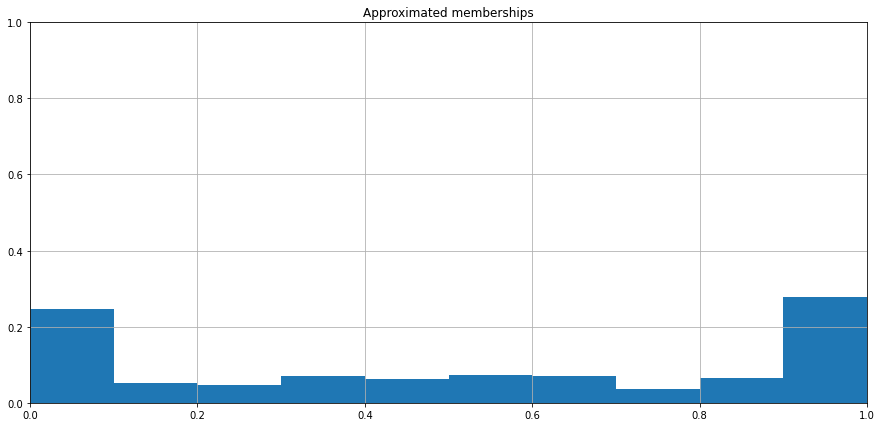

In [72]:
plot_hist(total_data["approximated memberships"])

plt.title("Approximated memberships")
plt.show()

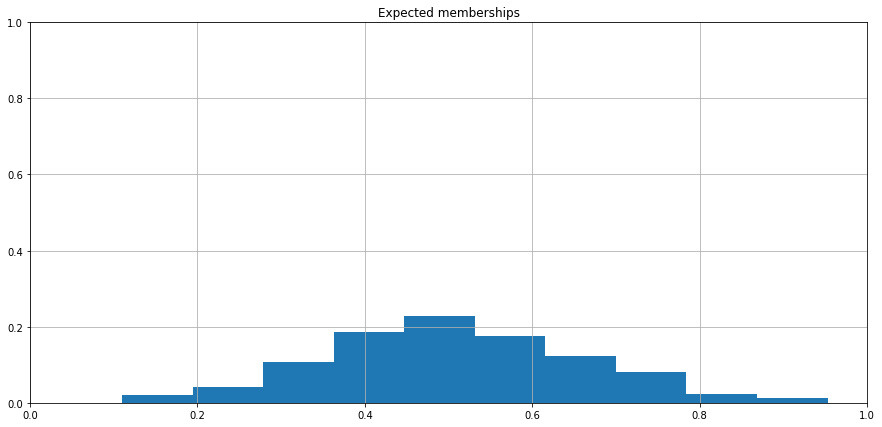

In [73]:
plot_hist(total_data["expected memberships"])

plt.title("Expected memberships")
plt.show()

Training error

In [74]:
RMSE(total_training_data["approximated memberships"], total_training_data["expected memberships"])

0.27209354003997127

Test error

In [75]:
RMSE(total_data["approximated memberships"], total_data["expected memberships"])

0.29101994826203

In [76]:
for i in select_radius(0.15, 0.5):
    print(i)

(0.6089572063281543, 0.5335764116917088)
(0.38574751998325585, 0.4836034829080462)
(0.6202191264023604, 0.5736954606490121)
(0.479942180131372, 0.4893577294209402)
(0.5753666072664425, 0.5982124992837604)
(0.6152957113712401, 0.4737996956062751)
(0.6099101327468828, 0.48594914770773)
(0.47263724983193367, 0.4887628748722583)
(0.36428436816070797, 0.4889633318057578)
(0.5767002466649462, 0.5332069000990189)
(0.6215285136519121, 0.5474781010521188)
(0.42400048028406667, 0.4595068188217413)
(0.5347666715560735, 0.7044062274244751)
(0.42086539641959786, 0.433690000849322)
(0.5455175550010942, 0.4850996117392196)
(0.36975282857619596, 0.5052998852083489)
(0.38278467677704353, 0.4775235213125759)
(0.35240427848898714, 0.4975286147305623)
(0.40032323479377896, 0.4486947312163794)
(0.48854909060193963, 0.5598902188307162)
(0.634222126439481, 0.4949677935821426)
(0.5956970404262718, 0.5105960519520993)
(0.5158954492281278, 0.5177076777439904)
(0.39044934446970814, 0.4952957455170847)
(0.3626520

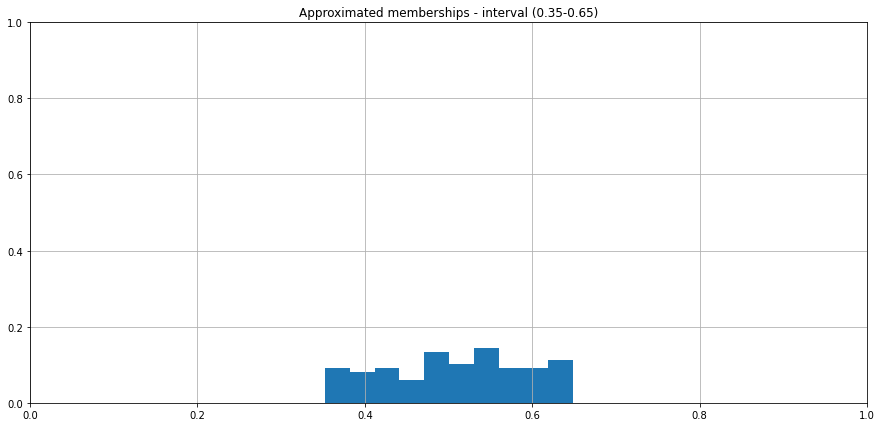

In [77]:
plot_hist([x[0] for x in select_radius(0.15, 0.5)])

plt.title("Approximated memberships - interval (0.35-0.65)")
plt.show()

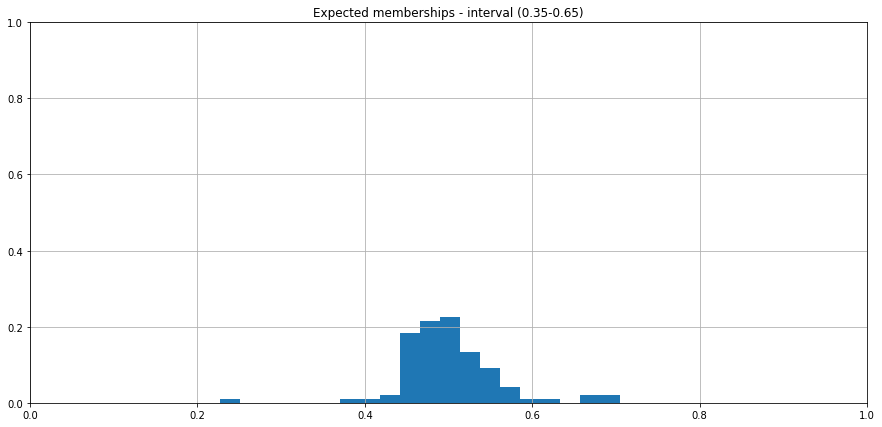

In [78]:
data = [x[1] for x in select_radius(0.15, 0.5)]
plt.figure(figsize=(15, 7))
weights = np.ones_like(data)/float(len(data))
binwidth = (max(data) - min(data)) / 10
plt.hist(data, bins=20, weights=weights)
plt.xlim(0,1)
plt.ylim(0,1)
plt.title("Expected memberships - interval (0.35-0.65)")
plt.grid()

In [79]:
recap = pd.DataFrame([[x[0], x[1]] for x in select_radius(0.15, 0.5)], columns=["approximated", "expected"])
RMSE(recap["approximated"], recap["expected"])

0.08851172803898673

# Baseline (Random Forest) - overlay

In [80]:
best_grid = [
    RandomForestRegressor(n_estimators=300, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, random_state=42),
    RandomForestRegressor(n_estimators=1000, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=8, random_state=42),
    RandomForestRegressor(n_estimators=300, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, random_state=42),
    RandomForestRegressor(n_estimators=100, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, random_state=42),
    RandomForestRegressor(n_estimators=1000, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, random_state=42)
]

In [81]:
# random_forest = RandomForestRegressor(random_state=42)

# Create the parameter grid based on the results of random search 
# param_grid = {
#     'bootstrap': [True],
#     'max_depth': [80, 90, 100, 110],
#     'max_features': [2, 3],
#     'min_samples_leaf': [3, 4, 5],
#     'min_samples_split': [8, 10, 12],
#     'n_estimators': [100, 200, 300, 1000]
# }

# best_grid = []

# rf_pred_train = []
# rf_pred_test = []

# rf_scores_train = []
# rf_scores_test = []
training_predictions = []
test_predictions = []

for i in range(0,5):
    X_train = models.folds['x train '+str(i)]
    y_train = models.folds['y train '+str(i)]
    X_test = models.folds['x test '+str(i)]
    y_test = models.folds['y test '+str(i)]
    
    # Instantiate the grid search model
    # gs = GridSearchCV(estimator = random_forest, param_grid = param_grid, cv = 4, n_jobs = -1, verbose = 2)
    # gs.fit(X_train, y_train)
    
    # y_pred_train = gs.best_estimator_.predict(X_train)
    # y_pred_test = gs.best_estimator_.predict(X_test)
    
    # best_grid.append(gs.best_estimator_)
    # rf_pred_train.append(y_pred_train)
    # rf_pred_test.append(y_pred_test)
    
    # rf_scores_train.append(np.sqrt(mean_squared_error(y_train, y_pred_train)))
    # rf_scores_test.append(np.sqrt(mean_squared_error(y_test, y_pred_test)))
    best_grid[i].fit(X_train, y_train)
    
    training_predictions.append((best_grid[i].predict(X_train), X_train))
    test_predictions.append((best_grid[i].predict(X_test), X_test))
    
# print("Training error: ", np.mean(rf_scores_train))
# print("Test error: ", np.mean(rf_scores_test))

In [82]:
for i in best_grid:
    print(i.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': 80, 'max_features': 3, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 3, 'min_samples_split': 8, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 300, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': 80, 'max_features': 3, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 4, 'min_samples_split': 8, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 1000, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': 80, 'max_features': 3, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 3, '

In [83]:
baseline_train_predictions = []
baseline_test_predictions = []
baseline_train_data = []
baseline_test_data = []

for i in training_predictions:
    for j, k in zip(i[0],i[1]):
        baseline_train_predictions.append(j)
        baseline_train_data.append(k)
        
for i in test_predictions:
    for j, k in zip(i[0],i[1]):
        baseline_test_predictions.append(j)
        baseline_test_data.append(k)
        
baseline_train = pd.DataFrame(columns=["x", "baseline training memberships"])
baseline_train["x"] = baseline_train_data
baseline_train["baseline training memberships"] = baseline_train_predictions
baseline_train["x"] = baseline_train["x"].apply(lambda s: tuple(s))
baseline_train = baseline_train.drop_duplicates(subset=['x'])
baseline_train["expected memberships"] = total_training_data["expected memberships"]

baseline_test = pd.DataFrame(columns=["x", "baseline test memberships"])
baseline_test["x"] = baseline_test_data
baseline_test["baseline test memberships"] = baseline_test_predictions
baseline_test["x"] = baseline_test["x"].apply(lambda s: tuple(s))
baseline_test = baseline_test.drop_duplicates(subset=['x'])
baseline_test["expected memberships"] = total_data["expected memberships"]

Training error

In [84]:
RMSE(baseline_train["baseline training memberships"], baseline_train["expected memberships"])

0.3069224455397553

Test error

In [85]:
RMSE(baseline_test["baseline test memberships"], baseline_test["expected memberships"])

0.3118922773917814

In [86]:
special_range = [(base[1], base[2]) for x, base in baseline_test.iterrows() if base[1] <= 0.65 and base[1] >= 0.35]
recap = pd.DataFrame([[x[0], x[1]] for x in special_range], columns=["approximated", "expected"])
RMSE(recap["approximated"], recap["expected"])

0.108869117992831